# On fait le TP1

In [30]:
import math
import numpy as np
import tempfile
import os
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import t

## Q1. Import Data

In [15]:
data = pd.read_csv('invest.txt', sep=" ", header=None)
data.columns = ["year", "gnp", "invest", "cpi", "interest"]
data = data.iloc[1: , :]
data.reset_index(drop=True, inplace=True)
data

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195,100,4.5
5,1973,1326.4,229.8,105.75,6.44
6,1974,1434.2,228.7,115.08,7.83
7,1975,1549.2,206.1,125.79,6.25
8,1976,1718,257.9,132.34,5.5
9,1977,1918.3,324.1,140.05,5.46


In [16]:
small_data = data.head(5)
small_data


,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195,100,4.5


## Q2. Plot Data

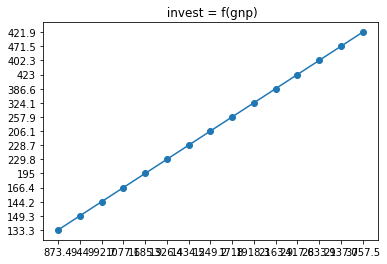

In [17]:
x = data['gnp']
y = data['invest']
plt.title(" invest = f(gnp)")
plt.scatter(x,y)
plt.plot(x,y)

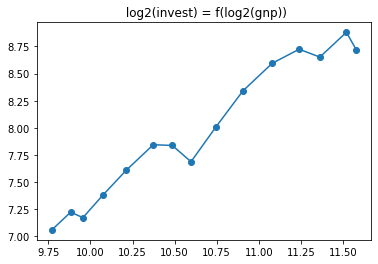

In [21]:
data['gnp_log2'] = np.log2(data['gnp'].values.astype(float))
data['invest_log2'] = np.log2(data['invest'].values.astype(float))
x = data['gnp_log2']
y = data['invest_log2']
plt.title(" log2(invest) = f(log2(gnp))")
plt.scatter(x,y)
plt.plot(x,y)

## Q3. Estimate

In [29]:
x = data['gnp']
y = data['invest']


x_list = x.tolist()
y_list = y.tolist()
x_list = [float(k) for k in x_list]
y_list = [float(k) for k in y_list]
print(x_list)
n = len(x_list)
x_mean = 0
y_mean = 0
for i in range(n):
    x_mean += x_list[i]
    y_mean += y_list[i]
x_mean = x_mean/n
y_mean = y_mean/n

B1 = 0
den = 0
for i in range(len(x_list)):
    B1 += (x_list[i] - x_mean) * (y_list[i] - y_mean)
    den += (x_list[i] - x_mean) * (x_list[i] - x_mean)
B1 = B1/den
    
B0 = y_mean-B1*x_mean

print('B1 = ' + str(B1))
print('B0 = ' + str(B0))

sieg = 0
for i in range(len(x_list)):
    sieg += (y_list[i] - (B0 + B1*x_list[i])) * (y_list[i] - (B0 + B1*x_list[i])) 
sieg = sieg / (n-2)



Var_B0 = sieg*(1/n + x_mean*x_mean/den)
Var_B1 = sieg/den

print('Var_B1 = ' + str(Var_B1))
print('Var_B0 = ' + str(Var_B0))

R2 = 0
den2 = 0
for i in range(len(x_list)):
    R2 += (B0+B1*x_list[i] - y_mean) * (B0+B1*x_list[i] - y_mean)
    den2 += (y_list[i] - y_mean) * (y_list[i] - y_mean)
R2 = R2/den2

print('R2 = ' + str(R2))

[873.4, 944.0, 992.7, 1077.6, 1185.9, 1326.4, 1434.2, 1549.2, 1718.0, 1918.3, 2163.9, 2417.8, 2633.1, 2937.7, 3057.5]
B1 = 0.15496368358808527
B0 = 5.02993790597327
Var_B1 = 0.00010469598906470838
Var_B0 = 373.3773529146645
R2 = 0.9463622043994033


## Q4. Test

In [34]:
alpha = 0.05
t01 = -t.ppf(1-alpha/2, n - (1+1))
t02 = t.ppf(1-alpha/2, n - (1+1))
test0 = B0/np.sqrt(Var_B0)
test1 = B1/np.sqrt(Var_B1)
if test0 < t02 and test0 > t01:
    print('ok for B0')
else:
    print('not ok for B0')
if test1 < t02 and test1 > t01:
    print('ok for B1')
else:
    print('not ok for B1')

p_value = 1 - t.cdf(test1, n - (1+1))

print('p-value is '+ str(p_value))

ok for B0
not ok for B1
p-value is 6.130546070792775e-10


## Q5. Estimate

In [37]:
gnp = 1000
invest = B0 + B1 * gnp
alpha = 0.1
print('estimated invest is '+str(invest))

sieg = 0
for i in range(len(x_list)):
    sieg += (y_list[i] - (B0 + B1*x_list[i])) * (y_list[i] - (B0 + B1*x_list[i])) 
sieg = sieg / (n-2)
den = 0
for i in range(len(x_list)):
    den += (x_list[i] - x_mean) * (x_list[i] - x_mean)


#confidence
CI01 = B0 + B1 * gnp - t.ppf(1-alpha/2, n-2)*np.sqrt(sieg)*np.sqrt(1/n+((gnp-x_mean)**2)/den)
CI02 = B0 + B1 * gnp + t.ppf(1-alpha/2, n-2)*np.sqrt(sieg)*np.sqrt(1/n+((gnp-x_mean)**2)/den)
print('Confidence interval is ['+str(CI01)+','+str(CI02)+str(']'))

#prediction
PI01 = B0 + B1 * gnp - t.ppf(1-alpha/2, n-2)*np.sqrt(sieg)*np.sqrt(1+1/n+((gnp-x_mean)**2)/den)
PI02 = B0 + B1 * gnp + t.ppf(1-alpha/2, n-2)*np.sqrt(sieg)*np.sqrt(1+1/n+((gnp-x_mean)**2)/den)
print('Prediction interval is ['+str(PI01)+','+str(PI02)+str(']'))


estimated invest is 159.99362149405854
Confidence interval is [141.2584553789126,178.7287876092045]
Prediction interval is [106.55528951696672,213.43195347115036]


## Q6. Logarithmic Plot

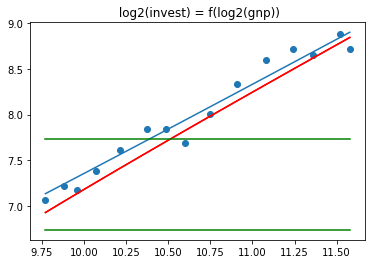

In [42]:
#data['gnp_log2'] = np.log2(data['gnp'].values.astype(float))
#data['invest_log2'] = np.log2(data['invest'].values.astype(float))
x = data['gnp_log2']
y = data['invest_log2']
plt.title(" log2(invest) = f(log2(gnp))")
plt.scatter(x,y)

y_pred =[]
for i in range(n):
    y_pred.append(B0 + B1*x_list[i])
data['y_pred'] = y_pred
data['y_pred_log2'] = np.log2(data['y_pred'].values.astype(float))
plt.plot(x,data['y_pred_log2'])

def CI(x):
    CI01 = B0 + B1 * x - t.ppf(1-alpha/2, n-2)*np.sqrt(sieg)*np.sqrt(1/n+((gnp-x_mean)**2)/den)
    CI02 = B0 + B1 * x + t.ppf(1-alpha/2, n-2)*np.sqrt(sieg)*np.sqrt(1/n+((gnp-x_mean)**2)/den)
    return CI01,CI02

def PI(x):
    PI01 = B0 + B1 * gnp - t.ppf(1-alpha/2, n-2)*np.sqrt(sieg)*np.sqrt(1+1/n+((gnp-x_mean)**2)/den)
    PI02 = B0 + B1 * gnp + t.ppf(1-alpha/2, n-2)*np.sqrt(sieg)*np.sqrt(1+1/n+((gnp-x_mean)**2)/den)
    return PI01,PI02

CI_low = []
for i in range(n):
    CI_low.append(CI(x_list[i])[0])
data['CI_low'] = CI_low
data['CI_low_log2'] = np.log2(data['CI_low'].values.astype(float))
plt.plot(x,data['CI_low_log2'],'r')
CI_high = []
for i in range(n):
    CI_high.append(CI(x_list[i])[1])
data['CI_high'] = CI_low
data['CI_high_log2'] = np.log2(data['CI_high'].values.astype(float))
plt.plot(x,data['CI_high_log2'],'r')
PI_low = []
for i in range(n):
    PI_low.append(PI(x_list[i])[0])
data['PI_low'] = PI_low
data['PI_low_log2'] = np.log2(data['PI_low'].values.astype(float))
plt.plot(x,data['PI_low_log2'],'g')
PI_high = []
for i in range(n):
    PI_high.append(PI(x_list[i])[1])
data['PI_high'] = PI_high
data['PI_high_log2'] = np.log2(data['PI_high'].values.astype(float))
plt.plot(x,data['PI_high_log2'],'g')

## Q7. Estimate